##### importing in the necessary packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

##### Reading in the CSV File

In [3]:
MD_agric_df  = pd.read_csv("MD_agric_exam-4313.csv")

##### Printing out the DataFrame

In [4]:
MD_agric_df

,Field_ID,Elevation,Rainfall,Min_temperature_C,Max_temperature_C,pH,Pollution_level,Plot_size,Annual_yield,Crop_type
0,1162,494.95615,1507.6,-5.4,31.0,6.859436,0.007034,3.6,1.617421,coffee
1,5108,663.73390,581.0,-4.7,30.9,5.603219,0.289643,4.2,2.532497,potato
2,3504,396.87990,1715.1,-6.1,31.7,5.774116,0.000409,2.6,1.262207,banana
3,5351,594.80370,1748.0,-4.3,33.6,6.477415,0.088777,7.9,4.351564,wheat
4,905,609.49800,1395.8,-4.5,31.3,5.419586,0.050023,10.8,5.034791,cassava
...,...,...,...,...,...,...,...,...,...,...
995,2202,572.95935,625.6,-5.5,31.0,5.258964,0.086330,1.2,0.750675,wheat
996,2531,552.80945,398.1,-5.9,33.4,4.607136,0.130178,0.8,0.449790,wheat
997,1040,678.22504,564.4,-4.6,31.7,5.567556,0.448149,1.2,0.492988,maize
998,58,792.65370,928.5,-3.3,31.2,5.102048,0.387350,1.1,0.597557,potato


##### Q1. Write code to determine the number of unique crop types in the dataset? 

In [5]:
len(MD_agric_df['Crop_type'].unique())

8

##### Q2. Identify the maximum annual yield for "wheat" crop type in the dataset (rounded to 2 decimal places)?

In [6]:
max_annual_yield = MD_agric_df[MD_agric_df['Crop_type'] == 'wheat']['Annual_yield'].max()
max_annual_yield

8.994376295629458

##### Q3. Find the total rainfall for crop types where the average pollution level is above 0.2.

In [7]:
data = MD_agric_df.groupby('Crop_type').agg({'Pollution_level': 'mean', 'Rainfall': 'sum'})
total_rainfall = data[data['Pollution_level']> 0.2]['Rainfall'].sum()
total_rainfall

941959.7000000001

##### Q4. Write a function to calculate the temperature range (Max_temperature_C - Min_temperature_C) for each farmer's field. Then, call the function with the following `Field_ID`: `1458`, `1895`, and `5443`. What are the results of these 3 calls?

In [14]:
def temp_range_calc(df, field_id):
    data = df[df['Field_ID'] == field_id][['Min_temperature_C', 'Max_temperature_C']] 
    temp_range = abs(data["Max_temperature_C"].values[0] - data["Min_temperature_C"].values[0])
    return temp_range


# Calling function on `Field_ID`: `1458`, `1895`, and `5443`
print(f'temperature range for Field_ID (1458): {temp_range_calc(MD_agric_df, 1458)}')
print(f'temperature range for Field_ID (1895): {temp_range_calc(MD_agric_df, 1895)}')
print(f'temperature range for Field_ID (5443): {temp_range_calc(MD_agric_df, 5443)}')

temperature range for Field_ID (1458): 40.7
temperature range for Field_ID (1895): 35.7
temperature range for Field_ID (5443): 33.4


Q5. What does the following code achieve?

a = data['Crop_type'].unique()  

b = float('inf')

c = ''

for crop in a:

        d = data[data['Crop_type'] == crop]['Min_temperature_C'].mean()

            if d < b:

                b = d

                c = crop
        
print(c)

In [9]:
# Answer: it identifies the crop type with the lowest average minimum temperature.

#####  Q6. Write code to calculate the total plot size for plots where the pH is less than 5.5?

In [10]:
plots_pH_less = MD_agric_df[MD_agric_df['pH'] < 5.5]
total_plotsize = plots_pH_less['Plot_size'].sum()
total_plotsize

1731.8999999999999

##### 7. Using Pandas, create a dataframe that includes entries with a 'Min_temperature_C’< -5 and a 'Max_temperature_C' > 30. How many rows are in the filtered dataset?

In [11]:
df = MD_agric_df.query("Min_temperature_C < -5 and Max_temperature_C > 30")
df.shape

(319, 10)

##### Q8. Using Numpy, calculate the standard deviation of the 'Rainfall' for plots where the 'Plot_size' is larger than the median plot size of the dataset (round to 2 decimal places)?

In [15]:
# Calculate the median plot size
median_plot_size = MD_agric_df['Plot_size'].median()

# Select plots with size larger than the median
rain_data = MD_agric_df['Rainfall'].values
plotsize_data = MD_agric_df['Plot_size'].values
rain_plot_greater = rain_data[plotsize_data > median_plot_size]

# Calculate the standard deviation of 'Rainfall'
rainfall_std =   rain_plot_greater.std()

# Round the result to 2 decimal places
Rainfall_sd_rounded = round(rainfall_std, 2)

Rainfall_sd_rounded

469.62

##### Q9. If you concatenate the first three digits of the most common ‘Max_temperature_C’ with the last three letters of the least common 'Crop_type', what string do you get?    Note: Use the first mode if there are multiple modes.

In [ ]:
most_common = MD_agric_df['Max_temperature_C'].mode()
a = most_common.values[0]

least_common = MD_agric_df.groupby('Crop_type')['Crop_type'].count().sort_values(ascending=True)
b = least_common.index[0]

print(str(a)[0:3]+b[-3:])


30.ice


##### Q10 . Write Python code to create a violin plot visualising the distribution of 'Annual_yield' across different 'Elevation' ranges.Use the provided elevation range categories (Low: < 300m, Medium: 300m - 600m, High: > 600m) to categorise the data before plotting.  Examine the violin plot displaying the distribution of 'Annual Yield' across three elevation categories (Low, Medium, High). What insight does the violin plot provide regarding the relationship between elevation ranges and annual yield distribution?

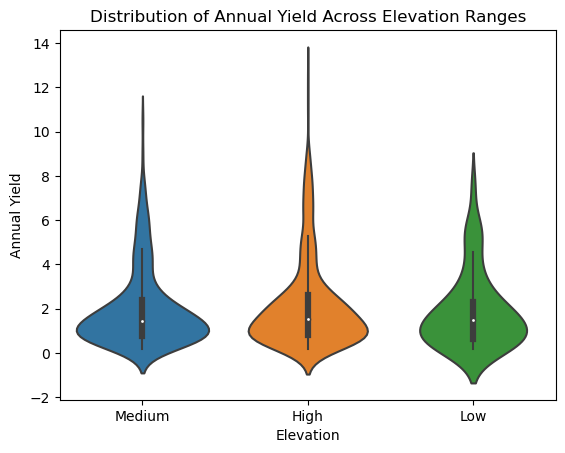

" \n10(answer): The 'Low' elevation category shows a more consistent yield distribution with less variability compared to the 'Medium' and 'High' categories. \nThis could indicate that lower elevations provide stable conditions for consistent agricultural output. \n\n"

In [16]:
def elevation_category(elevation):
    if elevation < 300:
        return 'Low'
    elif 300 <= elevation <= 600:
        return 'Medium'
    else:
        return 'High'


# Creating new column Elevation_category 
MD_agric_df['Elevation_category'] = MD_agric_df['Elevation'].apply(elevation_category)

# Creating Violin Plot
sns.violinplot(data= MD_agric_df, x="Elevation_category", y= 'Annual_yield')
plt.xlabel('Elevation')
plt.ylabel('Annual Yield')
plt.title('Distribution of Annual Yield Across Elevation Ranges')
plt.show()


""" 
10(answer): The 'Low' elevation category shows a more consistent yield distribution with less variability compared to the 'Medium' and 'High' categories. 
This could indicate that lower elevations provide stable conditions for consistent agricultural output. 

"""

 
##### Q11. Assuming each 'Crop_type' contributes an integer value equal to its length (e.g., 'wheat' contributes 5), write a recursive function to sum the integer values for each unique crop type in the dataset. What is the sum?



In [ ]:
def sum_crop_types(crop_types):
    if len(crop_types) == 0:
        return 0
    else:
        crop_type = crop_types[0]
        return len(crop_type) + sum_crop_types(crop_types[crop_types != crop_type])
    

# Calling recursive function
sum = sum_crop_types(MD_agric_df['Crop_type'].unique())
print(sum)

42


##### Q12. Write Python code to perform a t-test comparing the average 'Annual_yield' between 'coffee' and 'banana' crop types using scipy.stats. What is the p-value, rounded to three decimal places?

In [ ]:
banana_col = MD_agric_df[MD_agric_df['Crop_type'] == 'banana']['Annual_yield']
coffee_col = MD_agric_df[MD_agric_df['Crop_type'] == 'coffee']['Annual_yield']

t_stats, p_value = ttest_ind(banana_col, coffee_col, alternative = "two-sided", equal_var = False)

print(round(p_value, 3))

0.598


# THE END